## ผู้จัดทำ
นายสิทธิเจตน์ วงศ์ทิชาวัฒน์ 6210503853

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2022-04-10 12:59:29--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-04-10 12:59:29--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?rCFgjuMm8UR_vijxtehv31DOz0tbsmryw6GUODhsobb14kh4oRK4AOZoQpOX9gtg1F8SQ9PMhuAd3DQtRbwlnhVr7KP1sfiQluS4C8dcfdlbt

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [ ]:
!pip install  git+https://github.com/andreinechaev/nvcc4jupyter.git

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-utwwey4x
  Running command git clone -q https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-utwwey4x
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4306 sha256=ebd085276bfbe8b227dc60d8856aa10eaad4854d057eb79d198e4f065810e9d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-54ta3yh7/wheels/ca/33/8d/3c86eb85e97d2b6169d95c6e8f2c297fdec60db6e84cb56f5e
Successfully built NVCCPlugin


In [ ]:
!apt list --installed

Listing... Done
adduser/bionic,now 3.116ubuntu1 all [installed]
adwaita-icon-theme/bionic,now 3.28.0-1ubuntu1 all [installed,automatic]
apt/bionic-updates,now 1.6.14 amd64 [installed]
apt-utils/bionic-updates,now 1.6.14 amd64 [installed]
base-files/now 10.1ubuntu2.10 amd64 [installed,upgradable to: 10.1ubuntu2.11]
base-passwd/bionic,now 3.5.44 amd64 [installed]
bash/bionic-updates,now 4.4.18-2ubuntu1.2 amd64 [installed]
binutils/now 2.30-21ubuntu1~18.04.4 amd64 [installed,upgradable to: 2.30-21ubuntu1~18.04.7]
binutils-common/now 2.30-21ubuntu1~18.04.4 amd64 [installed,upgradable to: 2.30-21ubuntu1~18.04.7]
binutils-x86-64-linux-gnu/now 2.30-21ubuntu1~18.04.4 amd64 [installed,upgradable to: 2.30-21ubuntu1~18.04.7]
blt/bionic,now 2.5.3+dfsg-4 amd64 [installed,automatic]
bsdmainutils/bionic,now 11.1.2ubuntu1 amd64 [installed,automatic]
bsdutils/bionic-updates,bionic-security,now 1:2.31.1-0.4ubuntu3.7 amd64 [installed]
build-essential/bionic,now 12.4ubuntu1 amd64 [installed]
bzip2/bionic-

In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [ ]:
%%cu
#include <iostream>
int main() {
    std::cout << "Hello world\n";
    return 0;
}

Hello world



In [ ]:
%%file test.c
#include <stdio.h>
#include <omp.h>

int main(int argc, char** argv){
    int thread_id;

    #pragma omp parallel private(thread_id)
    {
        thread_id = omp_get_thread_num();
        printf("Hello from process: %d\n", thread_id );
    }
    return 0;
}


Writing test.c


In [ ]:
%%script bash
export OMP_NUM_THREADS=4

gcc test.c -o test -fopenmp
./test

Hello from process: 1
Hello from process: 0
Hello from process: 2
Hello from process: 3


In [ ]:
%%file test_mpi.c

#include <mpi.h>
#include <stdio.h>

int main(int argc, char** argv) {
    // Initialize the MPI environment
    MPI_Init(NULL, NULL);

    // Get the number of processes
    int world_size;
    MPI_Comm_size(MPI_COMM_WORLD, &world_size);

    // Get the rank of the process
    int world_rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

    // Get the name of the processor
    char processor_name[MPI_MAX_PROCESSOR_NAME];
    int name_len;
    MPI_Get_processor_name(processor_name, &name_len);

    // Print off a hello world message
    printf("Hello world from processor %s, rank %d out of %d processors\n",
           processor_name, world_rank, world_size);

    // Finalize the MPI environment.
    MPI_Finalize();
}

Writing test_mpi.c


In [ ]:
%%script bash
mpicc test_mpi.c -o test_mpi    
mpirun --allow-run-as-root -np 4 ./test_mpi

Hello world from processor ae4c31cf8fd2, rank 2 out of 4 processors
Hello world from processor ae4c31cf8fd2, rank 3 out of 4 processors
Hello world from processor ae4c31cf8fd2, rank 1 out of 4 processors
Hello world from processor ae4c31cf8fd2, rank 0 out of 4 processors


The example is obtained from NVIDIA mooc:
 the Symmetric Iterative Feistel Cipher application that you will be refactoring.

# Application code



In [ ]:
%%file fie.cu

#include <iostream>
#include <fstream>
#include <cstdint>
#include <string>

#include <cstdint>
#include <assert.h>
 

uint64_t sdiv (uint64_t a, uint64_t b) {
    return (a+b-1)/b;
}

void check_last_error ( ) {

    cudaError_t err;
    if ((err = cudaGetLastError()) != cudaSuccess) {
        std::cout << "CUDA error: " << cudaGetErrorString(err) << " : "
                  << __FILE__ << ", line " << __LINE__ << std::endl;
            exit(1);
    }
}

bool encrypted_file_exists(const char * encrypted_file) {

    FILE *file;
    file = fopen(encrypted_file, "r");
    if (file) {
        fclose(file);
        return true;
    } else {
        return false;
    }
}

void write_encrypted_to_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ofstream encrypted(encrypted_file, std::ios::binary);
    encrypted.write(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

void read_encrypted_from_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ifstream encrypted(encrypted_file, std::ios::binary);
    encrypted.read(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

class Timer {

    float time;
    const uint64_t gpu;
    cudaEvent_t ying, yang;

public:

    Timer (uint64_t gpu=0) : gpu(gpu) {
        cudaSetDevice(gpu);
        cudaEventCreate(&ying);
        cudaEventCreate(&yang);
    }

    ~Timer ( ) {
        cudaSetDevice(gpu);
        cudaEventDestroy(ying);
        cudaEventDestroy(yang);
    }

    void start ( ) {
        cudaSetDevice(gpu);
        cudaEventRecord(ying, 0);
    }

    void stop (std::string label) {
        cudaSetDevice(gpu);
        cudaEventRecord(yang, 0);
        cudaEventSynchronize(yang);
        cudaEventElapsedTime(&time, ying, yang);
        std::cout << "TIMING: " << time << " ms (" << label << ")" << std::endl;
    }
};


__host__ __device__ __forceinline__
uint32_t hash (uint32_t x) {

        x ^= x >> 16;
        x *= 0x85ebca6b;
        x ^= x >> 13;
        x *= 0xc2b2ae35;
        x ^= x >> 16;

        return x;
}

__host__ __device__ __forceinline__
uint64_t permute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;

    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x >> 32;
        const uint64_t lower = x & mask;
        const uint64_t mixer = hash(upper);

        x = upper + ((lower^mixer&mask) << 32);
    }

    return x;
}

__host__ __device__ __forceinline__
uint64_t unpermute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;
    
    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x & mask;
        const uint64_t lower = x >> 32;
        const uint64_t mixer = hash(upper);

        x = (upper << 32) + (lower^mixer&mask);
    }

    return x;
}


 
void encrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters, bool parallel=true) {

   
    for (uint64_t entry = 0; entry < num_entries; entry++)
        // Permute each data entry the number of iterations and then write result to data.
        data[entry] = permute64(entry, num_iters);
}
 

void decrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters) {
     // thread_id = .......
     //change entry = 0 -> entry = thread_id
     for (uint64_t entry = 0; entry < num_entries; entry++)
        
        data[entry] = unpermute64(data[entry], num_iters);
}
 
bool check_result_cpu(uint64_t * data, uint64_t num_entries,
                      bool parallel=true) {

    uint64_t counter = 0;

    
    for (uint64_t entry = 0; entry < num_entries; entry++)
    
        // Because we created initial data values by ranging from 0 to N-1,
        // and because encrypting and decrypting is symmetrical,
        // then each data entry should be equal to `entry`.
        counter += data[entry] == entry;

    // True if all values have been correctly decrypted.
    return counter == num_entries;
}

int main (int argc, char * argv[]) {
    // This file will be used to cache encryption results
    // so we don't have to wait on the CPU every time.
    const char * encrypted_file = "./encrypted";

    // Timer instance to be used for sections of the application.
    Timer timer;
    
    // Timer instance to be used for total time on the GPU(s).
    Timer overall;

    const uint64_t num_entries = 1UL << 15; // 26;
    const uint64_t num_iters = 1UL << 5 ; //10;
    
    // Use all available CPUs in parallel for host calculations.
    const bool openmp = true;

    // This timer start and then stop pattern will be used throughout the application.
    timer.start();
    uint64_t * data_cpu;
    uint64_t * data_gpu;
	
     
	
	  data_cpu = (uint64_t *) malloc(sizeof(uint64_t)*num_entries);

    
	  
    timer.stop("allocate memory");
    check_last_error();

    timer.start();
    // If encryption cache file does not exist...
    if (!encrypted_file_exists(encrypted_file)) {
        // ...encrypt data in parallel on CPU...
        encrypt(data_cpu, num_entries, num_iters, openmp);
        // ...and make encryption cache file for later.
    write_encrypted_to_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    } else {
        // Use encryption cache file if it exists.
    read_encrypted_from_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    }
    timer.stop("encrypt data on CPU");

    // Begin timing for total time on GPU(s).
    overall.start();
    timer.start();
  
    
    check_last_error();

    timer.start();
   
    // Decrypt data on GPU(s)......
	
    decrypt(data_cpu, num_entries, num_iters);

    timer.stop("decrypt data on GPU");
    check_last_error();

    timer.start();

    // Copy data from GPU to CPU.
    // .....

    timer.stop("copy data from GPU to CPU");
    // Stop timer for total time on GPU(s).
    overall.stop("total time on GPU");
    check_last_error();

    timer.start();
    // Check results on CPU.
    const bool success = check_result_cpu(data_cpu, num_entries, openmp);
    std::cout << "STATUS: test " 
              << ( success ? "passed" : "failed")
              << std::endl;
    timer.stop("checking result on CPU");

    timer.start();
	
    // Free memory.
    free(data_cpu);
     


    timer.stop("free memory");
    check_last_error();
}


Overwriting fie.cu


In [ ]:
%%script bash
nvcc  -Xcompiler="-march=native -fopenmp" fie.cu -o fie
 ./fie

TIMING: 0.011232 ms (allocate memory)
TIMING: 0.264384 ms (encrypt data on CPU)
TIMING: 23.1824 ms (decrypt data on GPU)
TIMING: 0.00272 ms (copy data from GPU to CPU)
TIMING: 23.2459 ms (total time on GPU)
STATUS: test passed
TIMING: 0.121184 ms (checking result on CPU)
TIMING: 0.022976 ms (free memory)


fie.cu(186): warning: variable "data_gpu" was declared but never referenced



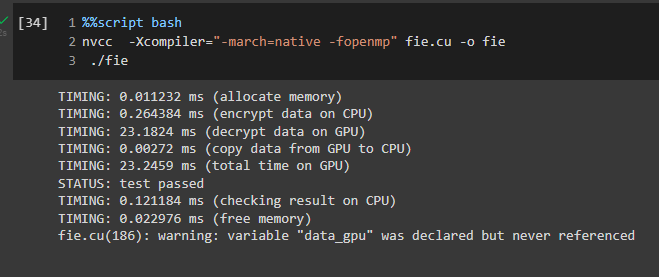

# Modification 1

* modify the encrypt part to utilize the CPU core puting openmp pragma properly

#pragma omp parallel for if (parallel)

(SET num thread to 4 when running)





## อธิบายโค้ด Modification 1
- ถ้าหากเราต้องการใช้ openmp เราต้อง #include <omp.h> ก่อน
- การ parallel loop encrypt จะสามารถทำได้โดยการเพิ่ม pragma omp parallel for if (parallel) ไปบน loop ที่เราต้องการ parallel
- option for ของ pragma จะทำให้งานถูกกระจายไปที่ thread แต่ละอันโดยที่เราไม่ต้องกำหนด range ให้
- option if จะทำการเช็คเงื่อนไขก่อนว่า parallel == True หรือไม่ หากใช่จะทำการ parallel loop นั้น

In [ ]:
%%file fie2.cu

#include <iostream>
#include <fstream>
#include <cstdint>
#include <string>

#include <cstdint>
#include <assert.h>
#include <omp.h>

uint64_t sdiv (uint64_t a, uint64_t b) {
    return (a+b-1)/b;
}

void check_last_error ( ) {

    cudaError_t err;
    if ((err = cudaGetLastError()) != cudaSuccess) {
        std::cout << "CUDA error: " << cudaGetErrorString(err) << " : "
                  << __FILE__ << ", line " << __LINE__ << std::endl;
            exit(1);
    }
}

bool encrypted_file_exists(const char * encrypted_file) {

    FILE *file;
    file = fopen(encrypted_file, "r");
    if (file) {
        fclose(file);
        return true;
    } else {
        return false;
    }
}

void write_encrypted_to_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ofstream encrypted(encrypted_file, std::ios::binary);
    encrypted.write(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

void read_encrypted_from_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ifstream encrypted(encrypted_file, std::ios::binary);
    encrypted.read(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

class Timer {

    float time;
    const uint64_t gpu;
    cudaEvent_t ying, yang;

public:

    Timer (uint64_t gpu=0) : gpu(gpu) {
        cudaSetDevice(gpu);
        cudaEventCreate(&ying);
        cudaEventCreate(&yang);
    }

    ~Timer ( ) {
        cudaSetDevice(gpu);
        cudaEventDestroy(ying);
        cudaEventDestroy(yang);
    }

    void start ( ) {
        cudaSetDevice(gpu);
        cudaEventRecord(ying, 0);
    }

    void stop (std::string label) {
        cudaSetDevice(gpu);
        cudaEventRecord(yang, 0);
        cudaEventSynchronize(yang);
        cudaEventElapsedTime(&time, ying, yang);
        std::cout << "TIMING: " << time << " ms (" << label << ")" << std::endl;
    }
};


__host__ __device__ __forceinline__
uint32_t hash (uint32_t x) {

        x ^= x >> 16;
        x *= 0x85ebca6b;
        x ^= x >> 13;
        x *= 0xc2b2ae35;
        x ^= x >> 16;

        return x;
}

__host__ __device__ __forceinline__
uint64_t permute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;

    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x >> 32;
        const uint64_t lower = x & mask;
        const uint64_t mixer = hash(upper);

        x = upper + ((lower^mixer&mask) << 32);
    }

    return x;
}

__host__ __device__ __forceinline__
uint64_t unpermute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;
    
    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x & mask;
        const uint64_t lower = x >> 32;
        const uint64_t mixer = hash(upper);

        x = (upper << 32) + (lower^mixer&mask);
    }

    return x;
}


 
void encrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters, bool parallel=true) {

    #pragma omp parallel for if (parallel)
    for (uint64_t entry = 0; entry < num_entries; entry++)
        // Permute each data entry the number of iterations and then write result to data.
        data[entry] = permute64(entry, num_iters);
}

// modify here
// 1. properly use threadidx to process proper element
// 2. use grid stride loop for a thread to traverse the data

void decrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters) {
     // thread_id = .......
     //change entry = 0 -> entry = thread_id
     for (uint64_t entry = 0; entry < num_entries; entry++)
        
        data[entry] = unpermute64(data[entry], num_iters);
}
 
bool check_result_cpu(uint64_t * data, uint64_t num_entries,
                      bool parallel=true) {

    uint64_t counter = 0;

    
    for (uint64_t entry = 0; entry < num_entries; entry++)
    
        // Because we created initial data values by ranging from 0 to N-1,
        // and because encrypting and decrypting is symmetrical,
        // then each data entry should be equal to `entry`.
        counter += data[entry] == entry;

    // True if all values have been correctly decrypted.
    return counter == num_entries;
}

int main (int argc, char * argv[]) {
    // This file will be used to cache encryption results
    // so we don't have to wait on the CPU every time.
    const char * encrypted_file = "./encrypted";

    // Timer instance to be used for sections of the application.
    Timer timer;
    
    // Timer instance to be used for total time on the GPU(s).
    Timer overall;

    const uint64_t num_entries = 1UL << 15; // 26;
    const uint64_t num_iters = 1UL << 5 ; //10;
    
    // Use all available CPUs in parallel for host calculations.
    const bool openmp = true;

    // This timer start and then stop pattern will be used throughout the application.
    timer.start();
    uint64_t * data_cpu;
    uint64_t * data_gpu;

     

    data_cpu = (uint64_t *) malloc(sizeof(uint64_t)*num_entries);

    //allocate data for data_gpu

    // copy data_cpu to data_gpu

    timer.stop("allocate memory");
    check_last_error();

    timer.start();
    // If encryption cache file does not exist...
    if (!encrypted_file_exists(encrypted_file)) {
        // ...encrypt data in parallel on CPU...
        encrypt(data_cpu, num_entries, num_iters, openmp);
        // ...and make encryption cache file for later.
    write_encrypted_to_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    } else {
        // Use encryption cache file if it exists.
    read_encrypted_from_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    }
    timer.stop("encrypt data on CPU");

    // Begin timing for total time on GPU(s).
    overall.start();
    timer.start();
  
    
    check_last_error();

    timer.start();
   
    // Decrypt data on GPU(s)......

    decrypt(data_cpu, num_entries, num_iters);

    timer.stop("decrypt data on GPU");
    check_last_error();

    timer.start();
    // Copy data from GPU to CPU.
    
    timer.stop("copy data from GPU to CPU");
    // Stop timer for total time on GPU(s).
    overall.stop("total time on GPU");
    check_last_error();

    timer.start();
    // Check results on CPU.
    const bool success = check_result_cpu(data_cpu, num_entries, openmp);
    std::cout << "STATUS: test " 
              << ( success ? "passed" : "failed")
              << std::endl;
    timer.stop("checking result on CPU");

    timer.start();

    // Free memory.
    free(data_cpu);
    // free data_gpu


    timer.stop("free memory");
    check_last_error();
}


Overwriting fie2.cu


In [ ]:
%%script bash
export OMP_NUM_THREADS=4

nvcc  -Xcompiler="-march=native -fopenmp" fie2.cu -o fie2
./fie2

TIMING: 0.011104 ms (allocate memory)
TIMING: 0.242464 ms (encrypt data on CPU)
TIMING: 22.5422 ms (decrypt data on GPU)
TIMING: 0.002752 ms (copy data from GPU to CPU)
TIMING: 22.6098 ms (total time on GPU)
STATUS: test passed
TIMING: 0.101536 ms (checking result on CPU)
TIMING: 0.02016 ms (free memory)


fie2.cu(189): warning: variable "data_gpu" was declared but never referenced



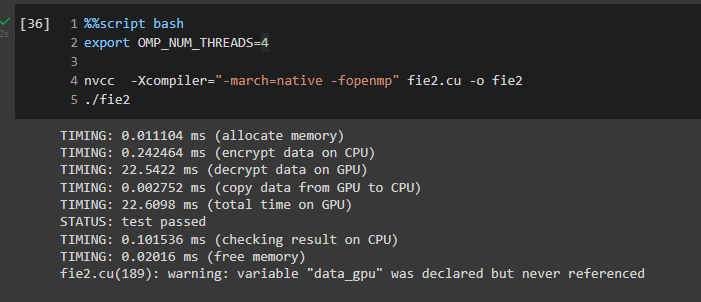

# Modification 2

Now that your encrpyt part has the CPUs

* modify the decrypt part to utilize the GPU
* check to see the time on the decrytion is faster than the encryption

## อธิบายโค้ด Modification 2
- ก่อนอื่นแปลง function decrypt ให้กลายเป็น kelnel code ก่อน โดยการประกาศ (`__global__`) ก่อนประกาศ function 
- ใน function decrypt เราจะต้องกระจายงานไปที่ thread แต่ละกัน โดยการกำหนด `thread_id = threadIdx.x + blockIdx.x * blockDim.x` และกำหนด `stride = blockDim.x * gridDim.x`
- ใน for loop เราจะให้ index เป็น thread_id และ index จะกระโดดทีละ stride
- จากนั้นสิ่งที่เขียนใน function main ได้แก่ การ allocate, copytodevice, เรียกใช้ kernel code, copytohost และ free ตัวแปรที่ allocate ไว้
- ให้ `size = sizeof(uint64_t)*num_entries`
- การ allocate memory บน cpu : `cudaMallocHost(&data_cpu, size);`
- การ allocate memory บน gpu : `cudaMallocManaged(&data_gpu, size);`
- การ copy จาก host ไป device : `cudaMemcpy(data_gpu, data_cpu, size, cudaMemcpyHostToDevice);`
- การเรียกใช้ kernel code : `decrypt<<<number_of_blocks,threads_per_block>>>(data_gpu, num_entries, num_iters);`
- การ copy จาก device ไป host : `cudaMemcpy(data_cpu, data_gpu, size, cudaMemcpyDeviceToHost);`
- การ free ตัวแปรที่ allocate ไว้บน cpu : `cudaFreeHost(data_cpu);`
- การ free ตัวแปรที่ allocate ไว้บน gpu : `cudaFree(data_gpu);`

In [ ]:
%%file file_modification_2.cu

#include <iostream>
#include <fstream>
#include <cstdint>
#include <string>

#include <cstdint>
#include <assert.h>
#include <omp.h>
 

uint64_t sdiv (uint64_t a, uint64_t b) {
    return (a+b-1)/b;
}

void check_last_error ( ) {

    cudaError_t err;
    if ((err = cudaGetLastError()) != cudaSuccess) {
        std::cout << "CUDA error: " << cudaGetErrorString(err) << " : "
                  << __FILE__ << ", line " << __LINE__ << std::endl;
            exit(1);
    }
}

bool encrypted_file_exists(const char * encrypted_file) {

    FILE *file;
    file = fopen(encrypted_file, "r");
    if (file) {
        fclose(file);
        return true;
    } else {
        return false;
    }
}

void write_encrypted_to_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ofstream encrypted(encrypted_file, std::ios::binary);
    encrypted.write(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

void read_encrypted_from_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ifstream encrypted(encrypted_file, std::ios::binary);
    encrypted.read(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

class Timer {

    float time;
    const uint64_t gpu;
    cudaEvent_t ying, yang;

public:

    Timer (uint64_t gpu=0) : gpu(gpu) {
        cudaSetDevice(gpu);
        cudaEventCreate(&ying);
        cudaEventCreate(&yang);
    }

    ~Timer ( ) {
        cudaSetDevice(gpu);
        cudaEventDestroy(ying);
        cudaEventDestroy(yang);
    }

    void start ( ) {
        cudaSetDevice(gpu);
        cudaEventRecord(ying, 0);
    }

    void stop (std::string label) {
        cudaSetDevice(gpu);
        cudaEventRecord(yang, 0);
        cudaEventSynchronize(yang);
        cudaEventElapsedTime(&time, ying, yang);
        std::cout << "TIMING: " << time << " ms (" << label << ")" << std::endl;
    }
};


__host__ __device__ __forceinline__
uint32_t hash (uint32_t x) {

        x ^= x >> 16;
        x *= 0x85ebca6b;
        x ^= x >> 13;
        x *= 0xc2b2ae35;
        x ^= x >> 16;

        return x;
}

__host__ __device__ __forceinline__
uint64_t permute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;

    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x >> 32;
        const uint64_t lower = x & mask;
        const uint64_t mixer = hash(upper);

        x = upper + ((lower^mixer&mask) << 32);
    }

    return x;
}

__host__ __device__ __forceinline__
uint64_t unpermute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;
    
    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x & mask;
        const uint64_t lower = x >> 32;
        const uint64_t mixer = hash(upper);

        x = (upper << 32) + (lower^mixer&mask);
    }

    return x;
}


 
void encrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters, bool parallel=true) {

    #pragma omp parallel for if (parallel)
    for (uint64_t entry = 0; entry < num_entries; entry++)
        // Permute each data entry the number of iterations and then write result to data.
        data[entry] = permute64(entry, num_iters);
}
 

__global__ void decrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters) {
     // thread_id = .......
     //change entry = 0 -> entry = thread_id
    
     int thread_id = threadIdx.x + blockIdx.x * blockDim.x;
     int stride = blockDim.x * gridDim.x;
    
     for (uint64_t entry = thread_id; entry < num_entries; entry += stride)
        
        data[entry] = unpermute64(data[entry], num_iters);
}
 
bool check_result_cpu(uint64_t * data, uint64_t num_entries,
                      bool parallel=true) {

    uint64_t counter = 0;

    
    for (uint64_t entry = 0; entry < num_entries; entry++)
    
        // Because we created initial data values by ranging from 0 to N-1,
        // and because encrypting and decrypting is symmetrical,
        // then each data entry should be equal to `entry`.
        counter += data[entry] == entry;

    // True if all values have been correctly decrypted.
    return counter == num_entries;
}

int main (int argc, char * argv[]) {
    // This file will be used to cache encryption results
    // so we don't have to wait on the CPU every time.
    const char * encrypted_file = "./encrypted";

    // Timer instance to be used for sections of the application.
    Timer timer;
    
    // Timer instance to be used for total time on the GPU(s).
    Timer overall;

    const uint64_t num_entries = 1UL << 15; // 26;
    const uint64_t num_iters = 1UL << 5 ; //10;
    
    // Use all available CPUs in parallel for host calculations.
    const bool openmp = true;

    // This timer start and then stop pattern will be used throughout the application.
    timer.start();
    uint64_t * data_cpu;
    uint64_t * data_gpu;
    int size = sizeof(uint64_t)*num_entries;

     

    cudaMallocHost(&data_cpu, size);
    cudaMallocManaged(&data_gpu, size);
    

    
 
    timer.stop("allocate memory");
    check_last_error();

    timer.start();
    // If encryption cache file does not exist...
    if (!encrypted_file_exists(encrypted_file)) {
        // ...encrypt data in parallel on CPU...
        encrypt(data_cpu, num_entries, num_iters, openmp);
        // ...and make encryption cache file for later.
    write_encrypted_to_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    } else {
        // Use encryption cache file if it exists.
    read_encrypted_from_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    }
    timer.stop("encrypt data on CPU");

    // Begin timing for total time on GPU(s).
    overall.start();
    timer.start();
  
    
    check_last_error();

    cudaMemcpy(data_gpu, data_cpu, size, cudaMemcpyHostToDevice);
    
    timer.start();
   
    // Decrypt data on GPU(s)......
	
    size_t threads_per_block = 256;
    size_t number_of_blocks = (num_entries + threads_per_block - 1) / threads_per_block;

    decrypt<<<number_of_blocks,threads_per_block>>>(data_gpu, num_entries, num_iters);
    cudaDeviceSynchronize();

    timer.stop("decrypt data on GPU");
    check_last_error();

    timer.start();

    // Copy data from GPU to CPU.
    // .....
    cudaMemcpy(data_cpu, data_gpu, size, cudaMemcpyDeviceToHost);

    timer.stop("copy data from GPU to CPU");
    // Stop timer for total time on GPU(s).
    overall.stop("total time on GPU");
    check_last_error();

    timer.start();
    // Check results on CPU.
    const bool success = check_result_cpu(data_cpu, num_entries, openmp);
    std::cout << "STATUS: test " 
              << ( success ? "passed" : "failed")
              << std::endl;
    timer.stop("checking result on CPU");

    timer.start();
	
    // Free memory.
    cudaFreeHost(data_cpu);
    cudaFree(data_gpu);
     


    timer.stop("free memory");
    check_last_error();
}


Overwriting file_modification_2.cu


In [ ]:
%%script bash
export OMP_NUM_THREADS=4

nvcc  -Xcompiler="-march=native -fopenmp" file_modification_2.cu -o file_modification_2
./file_modification_2

TIMING: 1.0201 ms (allocate memory)
TIMING: 0.134272 ms (encrypt data on CPU)
TIMING: 0.337536 ms (decrypt data on GPU)
TIMING: 0.127008 ms (copy data from GPU to CPU)
TIMING: 0.80464 ms (total time on GPU)
STATUS: test passed
TIMING: 0.15776 ms (checking result on CPU)
TIMING: 0.415904 ms (free memory)


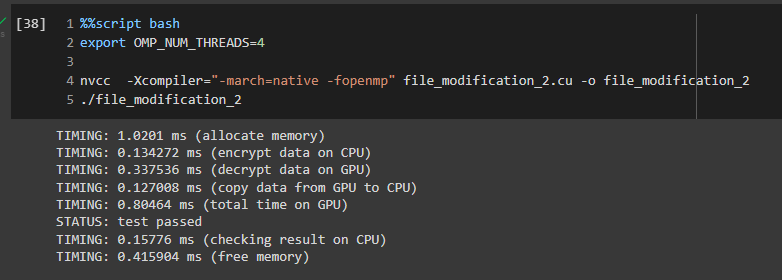

# Modification 3

* add the use of cudaStream in the decryption part. Create 5 cuda streams.

* check the results and the running time


## อธิบายโค้ด Modification 3
- ก่อนอื่นแปลง function decrypt ให้กลายเป็น kelnel code ก่อน โดยการประกาศ (`__global__`) ก่อนประกาศ function 
- ใน function decrypt เราจะต้องกระจายงานไปที่ thread แต่ละกัน โดยการกำหนด `thread_id = threadIdx.x + blockIdx.x * blockDim.x` และกำหนด `stride = blockDim.x * gridDim.x`
- ใน for loop เราจะให้ index เป็น thread_id และ index จะกระโดดทีละ stride
- จากนั้นสิ่งที่เขียนใน function main ได้แก่ การสร้าง stream, allocate, copytodevice ให้แต่ละ stream, เรียกใช้ kernel code ให้แต่ละ stream ทำ, copytohost ให้แต่ละ stream, ทำลาย stream ทิ้ง และ free ตัวแปรที่ allocate ไว้
- ให้จำนวน stream = 5 (`nStreams = 5`)
- ประกาศตัวแปร stream เป็น array ขนาด 5 (`cudaStream_t stream[nStreams];`)
- การ Create stream : วน for loop i ตั้งแต่ 0 ถึง nStream แล้วใน loop body สั่ง `cudaStreamCreate(&stream[i]);`
- ให้ `size = sizeof(uint64_t)*num_entries`
- การ allocate memory บน cpu : `cudaMallocHost(&data_cpu, size);`
- การ allocate memory บน gpu : `cudaMallocManaged(&data_gpu, size);`
- วน for loop i ตั้งแต่ 0 ถึง nStream
- ให้ `offset = (i * num_entries)/nStreams;` และ `streamEnd = ((i+1) * num_entries)/nStreams;`
- ส่ง datagpu ตั้งแต่ offset ไปจนถึง streamEnd ในแต่ละรอบให้ `stream[i]`
- การ copy จาก host ไป device : `cudaMemcpyAsync(&data_gpu[offset], &data_cpu[offset], sizeof(uint64_t)*(streamEnd - offset), cudaMemcpyHostToDevice, stream[i]);`
- การเรียกใช้ kernel code : `decrypt<<<number_of_blocks, threads_per_block, 0, stream[i]>>>(&data_gpu[offset], streamEnd - offset, num_iters);`
- การ copy จาก device ไป host : `cudaMemcpyAsync(&data_cpu[offset], &data_gpu[offset], sizeof(uint64_t)*(streamEnd - offset), cudaMemcpyDeviceToHost, stream[i]);`
- การ free ตัวแปรที่ allocate ไว้บน cpu : `cudaFreeHost(data_cpu);`
- การ free ตัวแปรที่ allocate ไว้บน gpu : `cudaFree(data_gpu);`

In [ ]:
%%file file_modification_3.cu

#include <iostream>
#include <fstream>
#include <cstdint>
#include <string>
#include <stdio.h>

#include <cstdint>
#include <assert.h>
#include <omp.h>

uint64_t sdiv (uint64_t a, uint64_t b) {
    return (a+b-1)/b;
}

void check_last_error ( ) {

    cudaError_t err;
    if ((err = cudaGetLastError()) != cudaSuccess) {
        std::cout << "CUDA error: " << cudaGetErrorString(err) << " : "
                  << __FILE__ << ", line " << __LINE__ << std::endl;
            exit(1);
    }
}

bool encrypted_file_exists(const char * encrypted_file) {

    FILE *file;
    file = fopen(encrypted_file, "r");
    if (file) {
        fclose(file);
        return true;
    } else {
        return false;
    }
}

void write_encrypted_to_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ofstream encrypted(encrypted_file, std::ios::binary);
    encrypted.write(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

void read_encrypted_from_file(const char * encrypted_file, uint64_t * data, size_t size) {
    std::ifstream encrypted(encrypted_file, std::ios::binary);
    encrypted.read(reinterpret_cast<char*>(data), size);
    encrypted.close();
}

class Timer {

    float time;
    const uint64_t gpu;
    cudaEvent_t ying, yang;

public:

    Timer (uint64_t gpu=0) : gpu(gpu) {
        cudaSetDevice(gpu);
        cudaEventCreate(&ying);
        cudaEventCreate(&yang);
    }

    ~Timer ( ) {
        cudaSetDevice(gpu);
        cudaEventDestroy(ying);
        cudaEventDestroy(yang);
    }

    void start ( ) {
        cudaSetDevice(gpu);
        cudaEventRecord(ying, 0);
    }

    void stop (std::string label) {
        cudaSetDevice(gpu);
        cudaEventRecord(yang, 0);
        cudaEventSynchronize(yang);
        cudaEventElapsedTime(&time, ying, yang);
        std::cout << "TIMING: " << time << " ms (" << label << ")" << std::endl;
    }
};


__host__ __device__ __forceinline__
uint32_t hash (uint32_t x) {

        x ^= x >> 16;
        x *= 0x85ebca6b;
        x ^= x >> 13;
        x *= 0xc2b2ae35;
        x ^= x >> 16;

        return x;
}

__host__ __device__ __forceinline__
uint64_t permute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;

    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x >> 32;
        const uint64_t lower = x & mask;
        const uint64_t mixer = hash(upper);

        x = upper + ((lower^mixer&mask) << 32);
    }

    return x;
}

__host__ __device__ __forceinline__
uint64_t unpermute64(uint64_t x, uint64_t num_iters) {

    constexpr uint64_t mask = (1UL << 32)-1;
    
    for (uint64_t iter = 0; iter < num_iters; iter++) {
        const uint64_t upper = x & mask;
        const uint64_t lower = x >> 32;
        const uint64_t mixer = hash(upper);

        x = (upper << 32) + (lower^mixer&mask);
    }

    return x;
}


 
void encrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters, bool parallel=true) {

    #pragma omp parallel for if (parallel)
    for (uint64_t entry = 0; entry < num_entries; entry++)
        // Permute each data entry the number of iterations and then write result to data.
        data[entry] = permute64(entry, num_iters);
}
 

__global__ void decrypt(uint64_t * data, uint64_t num_entries, 
                 uint64_t num_iters) {
     // thread_id = .......
     //change entry = 0 -> entry = thread_id
    
     uint64_t thread_id = threadIdx.x + blockIdx.x * blockDim.x;
     uint64_t stride = blockDim.x * gridDim.x;
    
     for (uint64_t entry = thread_id; entry < num_entries; entry+=stride)
        data[entry] = unpermute64(data[entry], num_iters);
}
 
bool check_result_cpu(uint64_t * data, uint64_t num_entries,
                      bool parallel=true) {

    uint64_t counter = 0;

    
    for (uint64_t entry = 0; entry < num_entries; entry++)
    
        // Because we created initial data values by ranging from 0 to N-1,
        // and because encrypting and decrypting is symmetrical,
        // then each data entry should be equal to `entry`.
        counter += data[entry] == entry;

    // True if all values have been correctly decrypted.
    return counter == num_entries;
}

int main (int argc, char * argv[]) {
    // This file will be used to cache encryption results
    // so we don't have to wait on the CPU every time.
    int nStreams = 5;
    cudaStream_t stream[nStreams];


    for (int i = 0; i < nStreams; i ++)
    {
        cudaStreamCreate(&stream[i]);
    }

    const char * encrypted_file = "./encrypted";

    // Timer instance to be used for sections of the application.
    Timer timer;
    
    // Timer instance to be used for total time on the GPU(s).
    Timer overall;

    const uint64_t num_entries = 1UL << 15; // 26;
    const uint64_t num_iters = 1UL << 5 ; //10;
    
    // Use all available CPUs in parallel for host calculations.
    const bool openmp = true;

    // This timer start and then stop pattern will be used throughout the application.
    timer.start();
    uint64_t *data_cpu;
    uint64_t *data_gpu;
    int size = sizeof(uint64_t)*num_entries;

     
    cudaMallocHost(&data_cpu, size);
    cudaMalloc(&data_gpu, size); 

    

    
 
    timer.stop("allocate memory");
    check_last_error();

    timer.start();
    // If encryption cache file does not exist...
    if (!encrypted_file_exists(encrypted_file)) {
        // ...encrypt data in parallel on CPU...
        encrypt(data_cpu, num_entries, num_iters, openmp);
        // ...and make encryption cache file for later.
    write_encrypted_to_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    } else {
        // Use encryption cache file if it exists.
    read_encrypted_from_file(encrypted_file, data_cpu, sizeof(uint64_t)*num_entries);
    }
    timer.stop("encrypt data on CPU");

    // Begin timing for total time on GPU(s).
    overall.start();
    timer.start();
  
    
    check_last_error();

    
    for (int i = 0; i < nStreams; ++i) {
        int offset = (i * num_entries)/nStreams;
        int streamEnd = ((i+1) * num_entries)/nStreams;
        cudaMemcpyAsync(&data_gpu[offset], &data_cpu[offset], sizeof(uint64_t)*(streamEnd - offset), cudaMemcpyHostToDevice, stream[i]);
    }

    timer.start();
   
    // Decrypt data on GPU(s)......
    size_t threads_per_block = 256;

    for (int i = 0; i < nStreams; ++i) {
      int offset = (i * num_entries)/nStreams;
      int streamEnd = ((i+1) * num_entries)/nStreams;
      size_t number_of_blocks = 32 * nStreams;
      decrypt<<<number_of_blocks, threads_per_block, 0, stream[i]>>>(&data_gpu[offset], streamEnd - offset, num_iters);
    }
    cudaDeviceSynchronize();

    timer.stop("decrypt data on GPU");
    check_last_error();

    timer.start();

    // Copy data from GPU to CPU.
    // .....
    for (int i = 0; i < nStreams; ++i) {
        int offset = (i * num_entries)/nStreams;
        int streamEnd = ((i+1) * num_entries)/nStreams;
        cudaMemcpyAsync(&data_cpu[offset], &data_gpu[offset], sizeof(uint64_t)*(streamEnd - offset), cudaMemcpyDeviceToHost, stream[i]);
    }

    timer.stop("copy data from GPU to CPU");
    // Stop timer for total time on GPU(s).
    overall.stop("total time on GPU");
    check_last_error();

    timer.start();
    // Check results on CPU.
    const bool success = check_result_cpu(data_cpu, num_entries, openmp);
    std::cout << "STATUS: test " 
              << ( success ? "passed" : "failed")
              << std::endl;
    timer.stop("checking result on CPU");

    for (int i = 0; i < nStreams; i ++)
    {
        cudaStreamDestroy(stream[i]);
    }
    
    timer.start();

    // Free memory.
    cudaFreeHost(data_cpu);
    cudaFree(data_gpu);

     


    timer.stop("free memory");
    check_last_error();
}


Overwriting file_modification_3.cu


In [ ]:
%%script bash

export OMP_NUM_THREADS=4
nvcc  -Xcompiler="-march=native -fopenmp" file_modification_3.cu -o file_modification_3
 ./file_modification_3

TIMING: 0.807424 ms (allocate memory)
TIMING: 0.157696 ms (encrypt data on CPU)
TIMING: 0.204288 ms (decrypt data on GPU)
TIMING: 0.109664 ms (copy data from GPU to CPU)
TIMING: 0.624672 ms (total time on GPU)
STATUS: test passed
TIMING: 0.109088 ms (checking result on CPU)
TIMING: 0.363872 ms (free memory)


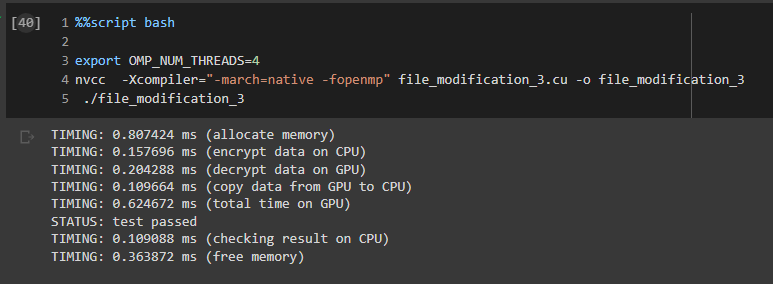